IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder

WRANGLE THE DATA

In [2]:
#wrangle the dataset
def wrangle(filepath):
    #import the dataset
    df = pd.read_csv(filepath)
    
    #convert charges to int
    df["charges"] = df["charges"].round().astype(int)
    
    #remove the outliers
    #remove the outliers
    low,high = df["charges"].quantile([0.1,0.8])
    mask_area = df["charges"].between(low,high)
    #apply the filter function
    df = df[mask_area]
    
    #return the dataset
    return df


In [3]:
#use the wrangle function to call the data
df = wrangle(r"C:\Users\IFB19-039\Desktop\machine learning\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16885
2,28,male,33.00,3,no,southeast,4449
4,32,male,28.88,0,no,northwest,3867
5,31,female,25.74,0,no,southeast,3757
6,46,female,33.44,1,no,southeast,8241


In [4]:
#print out the summary statistics
df[["age","bmi","charges"]].describe()

,age,bmi,charges
count,936.000000,936.000000,936.000000
mean,41.011752,30.297831,8907.972222
std,12.864280,6.095967,4444.273726
min,18.000000,16.815000,2353.000000
25%,30.000000,25.935000,5134.750000
50%,41.000000,29.920000,8435.500000
75%,52.000000,34.100000,11861.750000
max,64.000000,50.380000,20235.000000


Text(0.5, 1.0, 'Distribution of Charges')

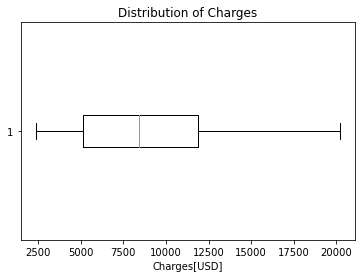

In [5]:
plt.boxplot(df["charges"],vert=False);
plt.xlabel("Charges[USD]")
plt.title("Distribution of Charges")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16885
2,28,male,33.00,3,no,southeast,4449
4,32,male,28.88,0,no,northwest,3867
5,31,female,25.74,0,no,southeast,3757
6,46,female,33.44,1,no,southeast,8241


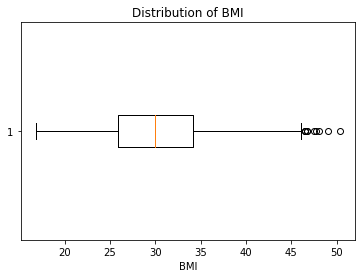

In [7]:
plt.boxplot(df["bmi"],vert=False);
plt.xlabel("BMI")
plt.title("Distribution of BMI");

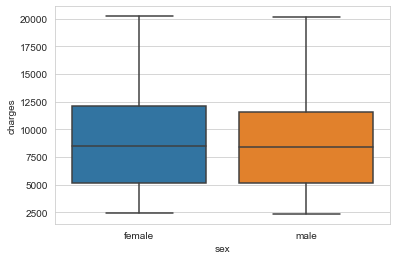

In [8]:
#relationship between categorical and numerical data
#is here a relationship between location and salaries reported
def plot_box(df, col, col_y = 'charges'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(df, 'sex')   


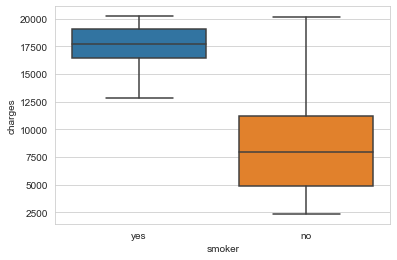

In [9]:
#relationship between categorical and numerical data
#is here a relationship between location and salaries reported
def plot_box(df, col, col_y = 'charges'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(df, 'smoker')   


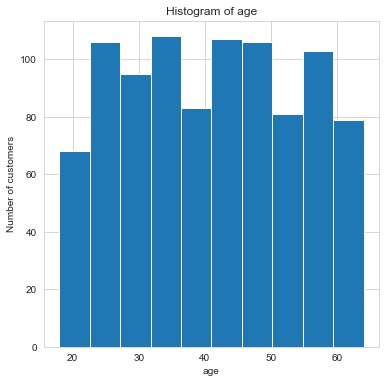

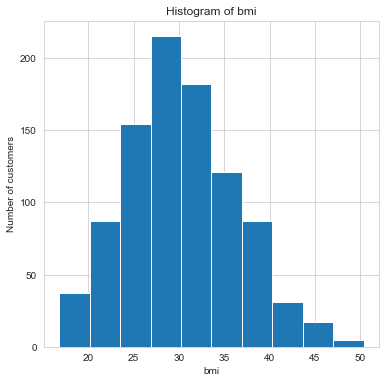

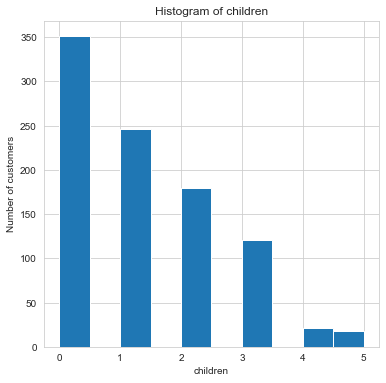

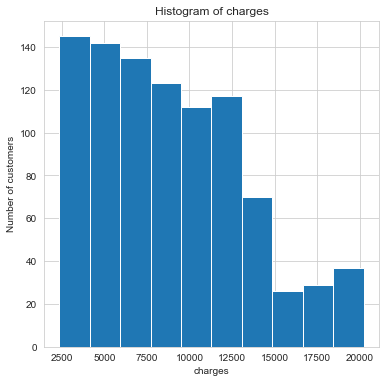

In [10]:
#use of histograms
def plot_histogram(medical_costs, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        medical_costs[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of customers')# Set text for y axis
        plt.show()
        
num_cols = ['age', 'bmi',
            'children', 'charges'
            ]    
plot_histogram(df, num_cols)

SPLIT DATASET

In [11]:
target = "charges"
features = ["age","sex","bmi","smoker","region"]
y_train = df[target]
X_train = df[features]

BASELINE FOR THE MODEL

In [15]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
print("Mean charges:",y_mean)
print("Baseline MAE:",mean_absolute_error(y_train,y_pred_baseline))

Mean charges: 8907.972222222223
Baseline MAE: 3680.3332146248813


ITERATE

In [17]:
#instantiate ohe
ohe = OneHotEncoder(use_cat_names=True)

#fit the model
ohe.fit(X_train)

#transform the data
XT_train = ohe.transform(X_train)

#print out the shape
print(XT_train.shape)
X_train.head()

(936, 10)


,age,sex,bmi,smoker,region
0,19,female,27.90,yes,southwest
2,28,male,33.00,no,southeast
4,32,male,28.88,no,northwest
5,31,female,25.74,no,southeast
6,46,female,33.44,no,southeast


BUILD A MODEL

In [18]:
model = make_pipeline(
        OneHotEncoder(use_cat_names=True),
        Ridge()
)
#fit the model
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['sex', 'smoker', 'region'],
                               use_cat_names=True)),
                ('ridge', Ridge())])

EVALUATE THE MODEL

In [21]:
y_pred_training = model.predict(X_train)
mae_train = mean_absolute_error(y_train,y_pred_training)
print("TRAINING MAE:", round(mae_train,2))

TRAINING MAE: 1361.75
